## COMP SCI 524
### Homework 5
### Jingde Wan

### Q1

In [1]:
## Starter code for question 1

using CSV, DataFrames
using PyPlot, JuMP, Gurobi

# read and convert into an array
vtarget = CSV.read(joinpath(@__DIR__, "voltages.csv"), DataFrame, header=false);
vtarget = Array(vtarget[:, 1]);

┌ Info: Precompiling Gurobi [2e9cd046-0924-5485-92f1-d5272153d98b]
└ @ Base loading.jl:1278
ERROR: LoadError:     Gurobi not properly installed. Please run Pkg.build("Gurobi"). For
    more information go to https://github.com/jump-dev/Gurobi.jl

Stacktrace:
 [1] error(::String) at ./error.jl:33
 [2] top-level scope at /Users/wanjingde/.julia/packages/Gurobi/JcjAE/src/Gurobi.jl:7
 [3] include(::Function, ::Module, ::String) at ./Base.jl:380
 [4] include(::Module, ::String) at ./Base.jl:368
 [5] top-level scope at none:2
 [6] eval at ./boot.jl:331 [inlined]
 [7] eval(::Expr) at ./client.jl:467
 [8] top-level scope at ./none:3
in expression starting at /Users/wanjingde/.julia/packages/Gurobi/JcjAE/src/Gurobi.jl:4


LoadError: [91mFailed to precompile Gurobi [2e9cd046-0924-5485-92f1-d5272153d98b] to /Users/wanjingde/.julia/compiled/v1.5/Gurobi/do9v6_gIyoJ.ji.[39m

In [ ]:
lambda = [0.1, 1, 10]
n = length(vtarget)

smooth = zeros(n, length(lambda)) # contain regularized voltage in different lambda

for i in 1:3
    
    model = Model(Gurobi.Optimizer)
    #set
    
    @variable(model, smoothv[1:n])
    
    # R(v)
    sumv = 0
    for i in 1:(n-1)
        sumv = sumv + (smoothv[i+1]-smoothv[i])^2
    end
    
    # difference between smooth voltage and vtarget
    difference = 0
    for i in 1:n
        difference = difference + (smoothv[i] - vtarget[i])^2
    end
    
    @objective(model, Min, difference + lambda[i]*sumv)
    optimize!(model)
    
    smooth[:, i] = JuMP.value.(smoothv)
    
end

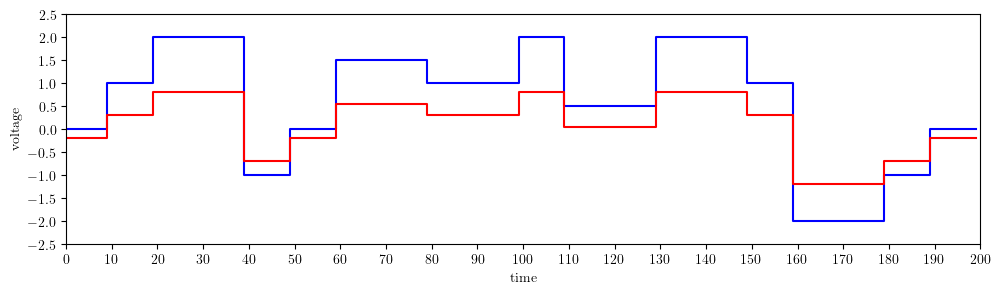

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcbcd004f40>

In [2]:
## Starter code for question 1

# PyPlot.svg(false)
# Use Latex for nice-looking axis titles
PyPlot.rc("text", usetex=true)
# Create a figure
figure(figsize=(10, 3))
# Set the limit to axes
axis([0, 200, -2.5, 2.5])
xlabel(L"\textrm{time}")
ylabel(L"\textrm{voltage}")
PyPlot.tight_layout()

# set ticks
ax = gca()
mx = matplotlib[:ticker][:MultipleLocator](10) # Define interval of major ticks
ax[:xaxis][:set_major_locator](mx) # Set interval of major ticks

my = matplotlib[:ticker][:MultipleLocator](.5)
ax[:yaxis][:set_major_locator](my)

# plot the target voltages
step(vtarget,"b-")

# add a dummy plot aside of it (you will need to replace this with your own plot)
step(smooth[:, 1] ./ 2 .- 0.2, "purple")
step(smooth[:, 2] ./ 2 .- 0.2, "yellow")
step(smooth[:, 3] ./ 2 .- 0.2, "green")

### Q2

#### (a)

In [55]:
## Starter code for question 2

A = CSV.read(joinpath(@__DIR__, "xy_data.csv"), DataFrame, header=false)
x = A[:,1]
y = A[:,2]

function plotpoints()
    figure(figsize=(10,3))
    xlabel("light intensity")
    ylabel("fluorescence")
    # set the x axis to have ticks 0-10
    xticks(0:10)

    plot(x, y, "b.")
end

# plot the points
# plotpoints()

# plot a dummy function(not the solution of course - that is for you to figure out)
# xvals = 0:0.1:10
# yvals = 0.001 * xvals.^3 - 0.01 * xvals.^2 + 0.1 * xvals .+ 0.001
# plot(xvals, yvals, "g-")
# title("cubic fit")


plotpoints (generic function with 1 method)

In [56]:
# Create the A matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n = length(x)
A = zeros(n,3) #zero fluorescence when the intensity is zero!
for i = 1:n
    for j = 1:3
        A[i,j] = x[i]^(3+1-j)
    end
end

In [ ]:
using JuMP, Gurobi

m = Model(Gurobi.Optimizer)

@variable(m, u[1:3])

@objective(m, Min, sum( (y-A*u).^2 ))

optimize!(m)
uopt = value. (u)
println(termination_status(m))
println("The objective value is ", objective_value(m))
println("The optimal parameters are ",uopt)

So the function is $$y = 0.00932501x^{3} - 0.134546x^{2} + 0.511155x$$

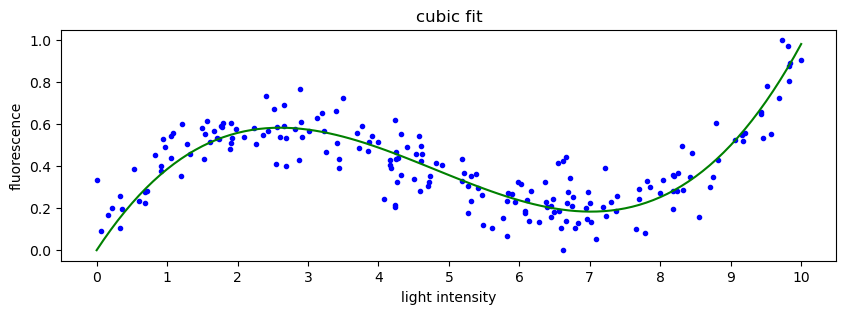

PyObject Text(0.5, 1.0, 'cubic fit')

In [12]:
using PyPlot

# uopt=[0.009,-0.1345,0.51]
# npts = 100
# xfine = range(0,stop=16,length=npts)
# ffine = ones(npts)

# for j = 1:3
#     ffine = [ffine.*xfine xfine]
# end

# ffine = ffine[:, 2:4]

# yfine = ffine * uopt
# figure(figsize=(10,3))

plotpoints()
#plot( x, y, "r.", markersize=10)

xvals = 0:0.1:10
yvals = 0.00932501 * xvals.^3 - 0.134546 * xvals.^2 + 0.511155 * xvals
plot(xvals, yvals, "g-")
title("cubic fit")

#### (b)

In [17]:
# number of points b/w 0 and 4
np = 0
for i in 1:length(x)
    if 0<=x[i]<4
        np = np+1
    end
end

# number of points b/w 0 and 4
nq = length(x)-np

124

In [21]:
Ap = zeros(np,3)
for i = 1:np
    for j = 1:3
        Ap[i,j] = x[i]^(3-j)
    end
end

Aq = zeros(nq,3)
for i = 1:nq
    for j = 1:3
        Aq[i,j] = x[i+np]^(3-j)
    end
end

yp = y[1:np, :]
yq = y[1+np: length(x)];

In [ ]:
using JuMP, Gurobi

m1 = Model(Gurobi.Optimizer)

@variable(m1, p[1:3])
@variable(m1, q[1:3])

@constraint(m1, p[3]==0)
@constraint(m1, 16p[1]+4p[2]+p[3] == 16q[1]+4q[2]+q[3]) # same value at x=4
@constraint(m1, 8p[1]+p[2] == 8q[1]+q[2]) # same slope at x=4

@objective(m1, Min, sum( (yp-Ap*p).^2 ) + sum( (yq-Aq*q).^2 ) )

optimize!(m1)
popt = value. (p)
qopt = value. (q)

println(termination_status(m1))
println("The objective value is ", objective_value(m1))
println("The optimal parameters for p are ",popt)
println("The optimal parameters for q are ",qopt)

so the function is

\begin{equation*}
y=\begin{cases}
          -0.0873261x^{2}+0.467682x & \text{if $0\leq x< 4$} \\
          0.0484683x^{2}-0.618673x+2.17271 & \text{if $4\leq x< 10$} \\
     \end{cases}
\end{equation*}

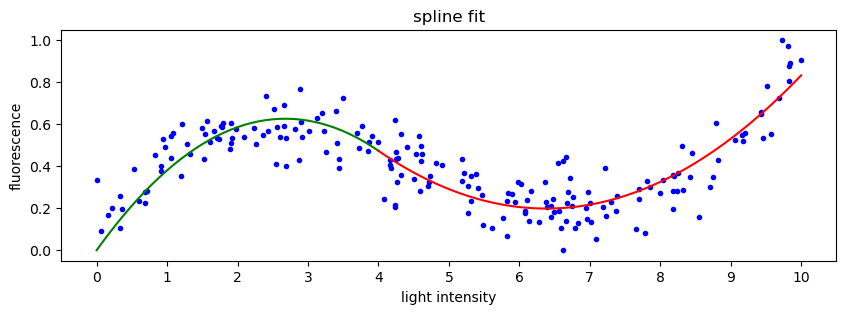

PyObject Text(0.5, 1.0, 'spline fit')

In [36]:
using PyPlot

xpvals = 0:0.1:4
ypvals = -0.0873261 * xpvals.^2 + 0.467682 * xpvals

xqvals = 4:0.1:10
yqvals = 0.0484683 * xqvals.^2 - 0.618673 * xqvals .+ 2.17271

plotpoints()
plot(xpvals, ypvals, "g-")
plot(xqvals, yqvals, "r-")
title("spline fit")

### Q3

#### (a)

In [50]:
using JuMP, Ipopt

m2 = Model(Ipopt.Optimizer)

# Alice
@variable(m2, ax[1:2, 1:60]) # resulting position
@variable(m2, av[1:2, 1:60]) # resulting velocity
@variable(m2, au[1:2, 1:60]) # thruster input

# Bob
@variable(m2, bx[1:2, 1:60]) # resulting position
@variable(m2, bv[1:2, 1:60]) # resulting velocity
@variable(m2, bu[1:2, 1:60]) # thruster input

# satisfy the dynamics
for t in 1:60-1
    @constraint(m2, ax[:,t+1] .== ax[:,t] + av[:,t]/3600)
    @constraint(m2, bx[:,t+1] .== bx[:,t] + bv[:,t]/3600)
    @constraint(m2, av[:,t+1] .== av[:,t] + au[:,t])
    @constraint(m2, bv[:,t+1] .== bv[:,t] + bu[:,t])
end

# position at t=1
@constraint(m2, ax[:,1] .== [0;0])
@constraint(m2, bx[:,1] .== [0.5;0])

# velocity at t=1
@constraint(m2, av[:,1] .== [0;20])
@constraint(m2, bv[:,1] .== [30;0])

# rendezvous at t=60
@constraint(m2, ax[:,60] .== bx[:, 60])

@objective(m2, Min, sum(au.^2) + sum(bu.^2))
optimize!(m2)

aX = JuMP.value.(ax)
bX = JuMP.value.(bx)

println("optimal rendezvous location: (", aX[1,60],",", aX[2,60], ")")

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1428
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      240

Total number of variables............................:      720
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      482
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

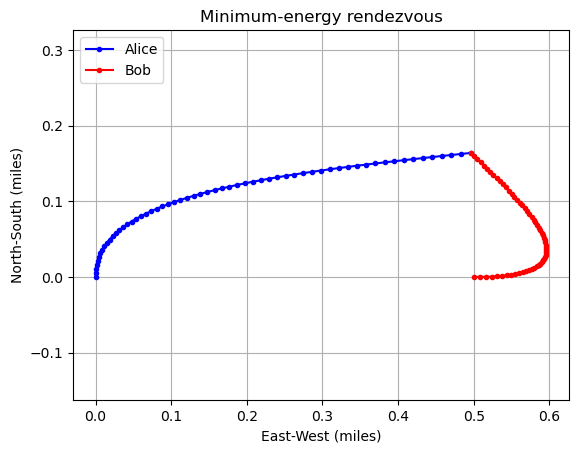

In [51]:
# some dummy code that can be modified to make the plots in Q3. 
# Of course, you will have to change the data ax and bx to be output from the optimization models.

using PyPlot

# ax=[0.0:.01:0.4 0.0:.005:0.2]; ax=ax';
# bx=[0.5:-.01:0.4 0.0:.02:0.2]; bx=bx';


plot(aX[1,:], aX[2,:],"b.-", label = "Alice")
plot(bX[1,:], bX[2,:],"r.-", label = "Bob")
xlabel("East-West (miles)")
ylabel("North-South (miles)")
legend(loc = "upper left")
grid()
axis("equal")
title("Minimum-energy rendezvous");

They do indeed rendezvous.

#### (b)

In [53]:
using JuMP, Ipopt

m2 = Model(Ipopt.Optimizer)

# Alice
@variable(m2, ax[1:2, 1:60]) # resulting position
@variable(m2, av[1:2, 1:60]) # resulting velocity
@variable(m2, au[1:2, 1:60]) # thruster input

# Bob
@variable(m2, bx[1:2, 1:60]) # resulting position
@variable(m2, bv[1:2, 1:60]) # resulting velocity
@variable(m2, bu[1:2, 1:60]) # thruster input

# satisfy the dynamics
for t in 1:60-1
    @constraint(m2, ax[:,t+1] .== ax[:,t] + av[:,t]/3600)
    @constraint(m2, bx[:,t+1] .== bx[:,t] + bv[:,t]/3600)
    @constraint(m2, av[:,t+1] .== av[:,t] + au[:,t])
    @constraint(m2, bv[:,t+1] .== bv[:,t] + bu[:,t])
end

# position at t=1
@constraint(m2, ax[:,1] .== [0;0])
@constraint(m2, bx[:,1] .== [0.5;0])

# velocity at t=1
@constraint(m2, av[:,1] .== [0;20])
@constraint(m2, bv[:,1] .== [30;0])

# rendezvous at t=60
@constraint(m2, ax[:,60] .== bx[:, 60])
@constraint(m2, av[:,60] .== bv[:, 60])

@objective(m2, Min, sum(au.^2) + sum(bu.^2))
optimize!(m2)

aX = JuMP.value.(ax)
bX = JuMP.value.(bx)
println("optimal rendezvous location: (", aX[1,60],",", aX[2,60], ")")

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1432
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      240

Total number of variables............................:      720
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      484
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

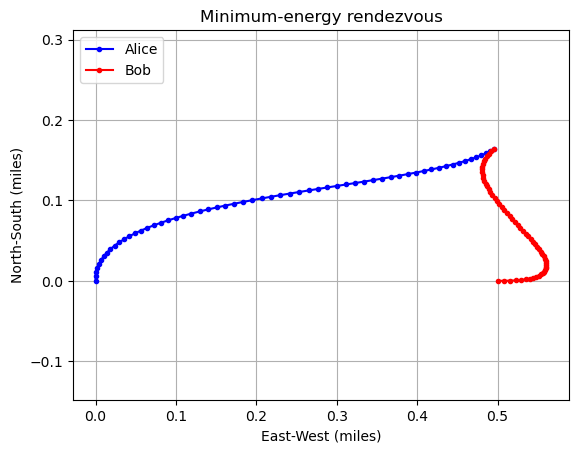

In [54]:
# some dummy code that can be modified to make the plots in Q3. 
# Of course, you will have to change the data ax and bx to be output from the optimization models.

using PyPlot

# ax=[0.0:.01:0.4 0.0:.005:0.2]; ax=ax';
# bx=[0.5:-.01:0.4 0.0:.02:0.2]; bx=bx';


plot(aX[1,:], aX[2,:],"b.-", label = "Alice")
plot(bX[1,:], bX[2,:],"r.-", label = "Bob")
xlabel("East-West (miles)")
ylabel("North-South (miles)")
legend(loc = "upper left")
grid()
axis("equal")
title("Minimum-energy rendezvous");

 The optimal rendezvous location is the same as the one found in the first part.
 
 optimal rendezvous location: (0.49583333333333324, 0.1638888888888889)